### **Logbook Es_01**

Logbook prima esercitazione di TD 23/09/2025 \frac{1}{2}



Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1


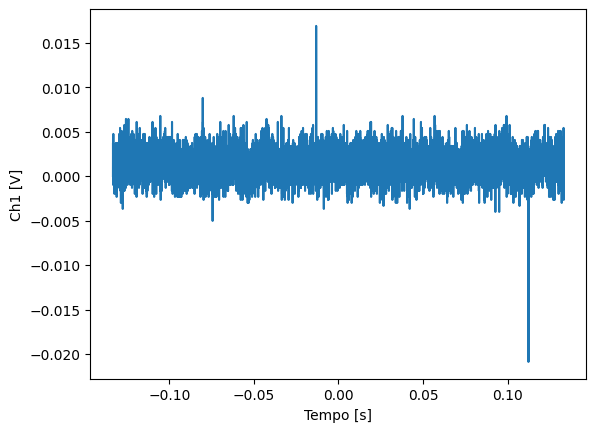

In [8]:
import tdwf
import numpy as np
import matplotlib.pyplot as plt
import time

plt.close('all')

ad2 = tdwf.AD2()
scope = tdwf.Scope(ad2.hdwf)
scope.fs = 3e4
scope.npt = 8000

scope.ch1.range = 5.0
scope.ch2.range = 50.0
#scope.ch1.avg = True

scope.sample()

time.sleep(0.5)

#print(scope.ch1.vals)

plt.plot(scope.time.vals, scope.ch1.vals, '-')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

plt.show()

esempio acquisizione con ch1 floted
ATTENZIONE: il ch1- è collegato a terra, il ch1 acquisisce segnali diversi a seconda della sua posizione, se tenuto sollevato registra li rumore a 50 Hz, mentre se tenuto vicino al ch1- shorted con la terra non registra nulla, solo rumore spurio.


di seguito configurazione del generatore di funzioni di AD2 identificato dal canale W

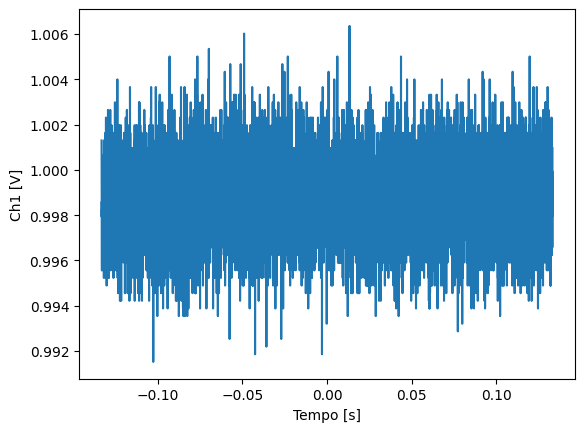

In [10]:
wgen = tdwf.WaveGen(ad2.hdwf)   #inizializzazione del generatore
wgen.w1.config(offs=1, func=tdwf.funcDC)    #impostazione dell'offset del segnale e del tipo di funzione in output
wgen.w1.start() #avvio del generatore

#posso anche controllare le impostazioni del canale W singolarmente

'''
wgen = tdwf.WaveGen(ad2.hdwf)
wgen.w1.offs = 1.0      #impostazione dell'offset del segnale
wgen.w1.func = tdwf.funcDC   #impostazione del tipo di funzione in output
wgen.w1.start() #avvio del generatore
'''
scope.sample()
time.sleep(0.5)

plt.plot(scope.time.vals, scope.ch1.vals, '-')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

plt.show()
